In [1]:
# Gerekli kütüphanler
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
import cv2
from tensorflow.keras.preprocessing import image
from sklearn.metrics import confusion_matrix
import itertools

In [2]:
train_dir = 'data/train'
val_dir = 'data/val'
train_images= glob(train_dir + '/*/*.jpg')
val_images = glob(val_dir + '/*/*.jpg')

In [3]:
# Burada train klasörü içindeki 
# dosyaların dizinini  alıyoruz
# burada her bir sınıf için bir klasör var
# yani klasör sayısı kadar sınıf var
d = glob(train_dir + '/*')
# listenin uzunluğunu buluyoruz.
# yani kaç tane klasör olduğunu
# bu da sınıf sayısına eşit
o=len(d)

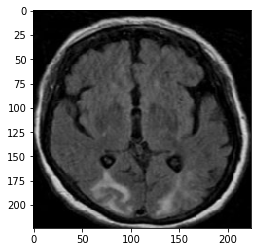

In [4]:
# Bu kod her seferinde rastgele bir resim gösterir.
image_name=np.random.choice(train_images)
img = cv2.imread(image_name)
img = cv2.resize(img, (224,224))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img);


In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# burada data augmentation yani veri çoğaltma yapıyoruz.
# veriler yüklenirken verilere ek işlem uygulanıyor.
# örneğin burada horizontal_flip=True denmiş.
# Bu sayede resmin yatay çevirilmiş halini de kullanıyoruz.
# buradaki rescale ifadesini daha önce gördük zaten
# rotation_range=40, resmi 40 derece rastgele döndür
# width_shift_range=0.2, resmi yatayda yüzde 20 oranında kaydır
# height_shift_range=0.2, resmi dikeyde yüzde 20 oranında kaydır
# shear_range=0.2, resmi yüzde 20 oranında kırp
# zoom_range=0.2, resme yüzde 20 oranında yaklaş ve uzaklaş
# fill_mode='nearest', yeni oluşacak piksellere değer atarken
# en yakınındaki pikselleri kullan demek
train_datagen = ImageDataGenerator(
      rescale=1.0/255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
# Bunu doğrulama verileri için yapmayız
# eğitim verileri için yaparız. Bu sayede
# hem eğitim verisini arttrıp  hem de çeşitlendiririz.
# Bu sayede model daha iyi öğrenebilir
val_datagen  = ImageDataGenerator( rescale = 1.0/255. )

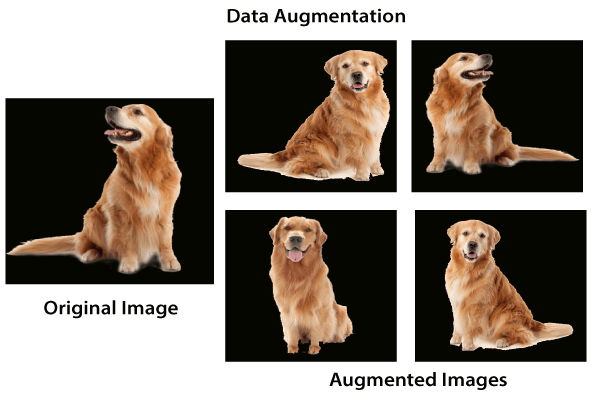

In [6]:
# burada ikiden fazla sınıf olduğu için 
# class_mode=sparse oldu
train_generator = train_datagen.flow_from_directory(
  train_dir,
  shuffle=True,
  batch_size=16,
  target_size=[224,224],
  class_mode='sparse')
valid_generator = val_datagen.flow_from_directory(
  val_dir,
  batch_size=16,
  target_size=[224,224],
  class_mode='sparse')

Found 316 images belonging to 4 classes.
Found 78 images belonging to 4 classes.


In [7]:
from tensorflow.keras.layers import Dense, Flatten,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
vgg_model = VGG16(
    input_shape=[224,224,3], weights='imagenet', include_top=False)
for layer in vgg_model.layers:
  layer.trainable = False
fl = Flatten()(vgg_model.output)
x = Dense(1024, activation='relu')(fl)
x=Dropout(0.2)(x)
# son katmandaki nöron sayısı sınıf sayısı kadar olmalı.
# normalde bunu elle yazabiliriz fakat sınıf sayısını bulup
# bu şekilde yapmak daha iyidir
out = Dense(o, activation='softmax')(x)
model = Model(inputs=vgg_model.input, outputs=out)

In [8]:
model.compile(optimizer = 'Adam', 
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['accuracy'])

In [9]:
r= model.fit(
  train_generator,
  validation_data=valid_generator,
  epochs=80)

Epoch 1/80
20/20 [==============================] - 83s 3s/step - loss: 4.5352 - accuracy: 0.3639 - val_loss: 1.9773 - val_accuracy: 0.5128
Epoch 2/80
20/20 [==============================] - 8s 388ms/step - loss: 1.8554 - accuracy: 0.4937 - val_loss: 1.9144 - val_accuracy: 0.6026
Epoch 3/80
20/20 [==============================] - 8s 391ms/step - loss: 1.4576 - accuracy: 0.5000 - val_loss: 1.7958 - val_accuracy: 0.4744
Epoch 4/80
20/20 [==============================] - 8s 407ms/step - loss: 1.2454 - accuracy: 0.5316 - val_loss: 0.7976 - val_accuracy: 0.5641
Epoch 5/80
20/20 [==============================] - 8s 395ms/step - loss: 0.9689 - accuracy: 0.6013 - val_loss: 0.7337 - val_accuracy: 0.7179
Epoch 6/80
20/20 [==============================] - 8s 397ms/step - loss: 0.8043 - accuracy: 0.6772 - val_loss: 0.7120 - val_accuracy: 0.6410
Epoch 7/80
20/20 [==============================] - 8s 399ms/step - loss: 0.8411 - accuracy: 0.6424 - val_loss: 0.6747 - val_accuracy: 0.6795
Epoch 8/

20/20 [==============================] - 10s 495ms/step - loss: 0.4248 - accuracy: 0.8418 - val_loss: 0.6271 - val_accuracy: 0.7821
Epoch 59/80
20/20 [==============================] - 9s 442ms/step - loss: 0.4185 - accuracy: 0.8165 - val_loss: 0.7468 - val_accuracy: 0.7436
Epoch 60/80
20/20 [==============================] - 9s 451ms/step - loss: 0.5202 - accuracy: 0.7975 - val_loss: 0.6770 - val_accuracy: 0.7692
Epoch 61/80
20/20 [==============================] - 9s 443ms/step - loss: 0.4609 - accuracy: 0.8323 - val_loss: 0.6323 - val_accuracy: 0.6923
Epoch 62/80
20/20 [==============================] - 9s 442ms/step - loss: 0.4608 - accuracy: 0.8228 - val_loss: 0.7659 - val_accuracy: 0.8077
Epoch 63/80
20/20 [==============================] - 9s 440ms/step - loss: 0.4558 - accuracy: 0.8418 - val_loss: 0.6872 - val_accuracy: 0.7564
Epoch 64/80
20/20 [==============================] - 9s 460ms/step - loss: 0.4159 - accuracy: 0.8418 - val_loss: 0.6781 - val_accuracy: 0.7564
Epoch 65/8

In [10]:
model.evaluate(valid_generator)

5/5 [==============================] - 2s 292ms/step - loss: 0.5734 - accuracy: 0.7821


[0.5733991265296936, 0.7820512652397156]

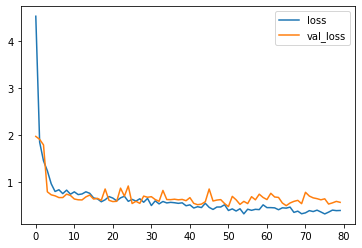

In [11]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

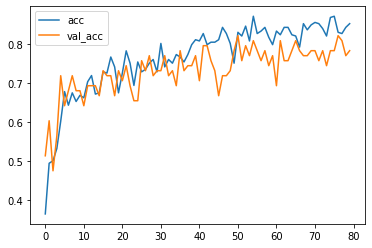

In [12]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [13]:
# Burada etiket adlarını buluyrouz. Bunun için val_datagen kullanıyoruz.
# train_datagen ise olmaz. Çünkü orada data augmentaiton yaptık. 
# o yüzden onu kullanmaya gerek yok.
test_gen = val_datagen.flow_from_directory(val_dir, target_size=[224,224])
# burada etikteleri(sınıfları) yazdıryoruz. Ayrıca hangi etikete hangi
# sayının atandığı da gözüküyor.
print(test_gen.class_indices)
# burada boş bir liste oluşturuyoruz eleman sayısı ise etiket sayısı kadar
labels = [None] * len(test_gen.class_indices)
# burada v indis, k ise etiket
for k, v in test_gen.class_indices.items():
  # sırayla etiketleri bu listeye ekliyoruz.
  labels[v] = k
# bu işlemi kendimiz etiketleri labels'ın içine yazabiliriz
# ama burada sıra öenmli doğru sırayı bulamayabailiriz

Found 78 images belonging to 4 classes.
{'glioma_tumor': 0, 'meningioma_tumor': 1, 'no_tumor': 2, 'pituitary_tumor': 3}


In [14]:
# Burada confusion matrix oluşturmak için
# bir fonksiyon yazıyoruz. # kod biraz karışık 
# o yüzden anlatamyacağım. Kendi kodunuza göre uygun yerleri değiştirip 
# kullanabilirsiniz
batch_size=16
IMAGE_SIZE=[224,224]
def get_confusion_matrix(data_path, N):
  print("Generating confusion matrix", N)
  predictions = []
  targets = []
  i = 0
  n_images = 0
  for x, y in val_datagen.flow_from_directory(
      data_path,
      target_size=IMAGE_SIZE,
      shuffle=False,
      batch_size=batch_size * 2):
    i += 1
    n_images += len(y)
    if i % 50 == 0:
      print(f'{n_images} images processed.')
    p = model.predict(x)
    p = np.argmax(p, axis=1)
    y = np.argmax(y, axis=1)
    predictions = np.concatenate((predictions, p))
    targets = np.concatenate((targets, y))
    if len(targets) >= N:
      break
  cm = confusion_matrix(targets, predictions)
  return cm

In [15]:
# burada confusion matrix buluyoruz.
# Bu modelin veriler için yaptığı tahminleri ve kaçının
# doğru olduğunu gösterir. Örneğin modelin tahmini 1. sınıf iken
# gerçekte 0. sınıf oaln kaç veri oldupunu söyler
# burada köşegenler doğru tahmdir. O yüzden köşegenlerdeki sayıların
# yüksek olması lazım başarılı bir model için
cm = get_confusion_matrix(val_dir, len(val_images))
print(cm)

Generating confusion matrix 78
Found 78 images belonging to 4 classes.
[[14  0  4  2]
 [ 9 14  0  0]
 [ 1  0 19  1]
 [ 0  0  0 14]]


In [114]:
# Burada confuison matrix'i görselleştiriyoruz.
# kodu anlamaya fazla gerek yok. 
# Zaten görselleştirme kodu ve genelde 
# hazır kullanılır bu kod
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
     
  else:
    
      print('Confusion matrix, without normalization')

  print(cm)

  plt.figure(figsize=(10, 10))
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  #plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)
  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

Confusion matrix, without normalization
[[14  0  4  2]
 [ 9 14  0  0]
 [ 1  0 19  1]
 [ 0  0  0 14]]


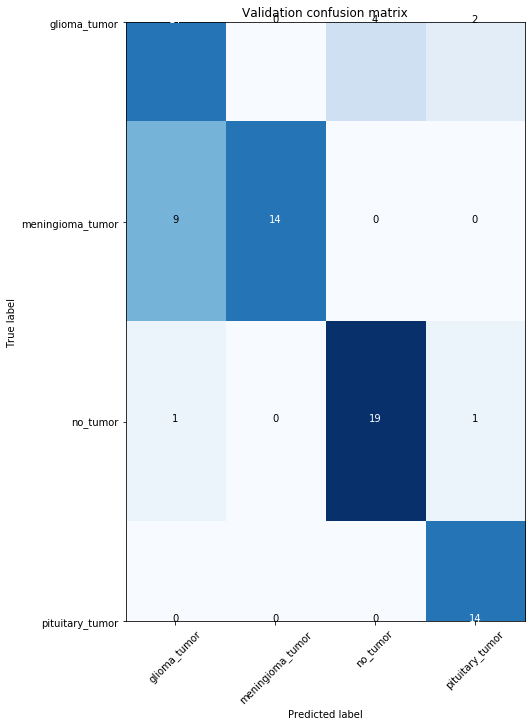

In [115]:
#yukarıda fonskiyon oluşturmuştuk burada çağırıyoruz
plot_confusion_matrix(cm, labels, title='Validation confusion matrix')

Gercek etiket: data/val\glioma_tumor\image(54).jpg
Modelin tahmini meningioma_tumor


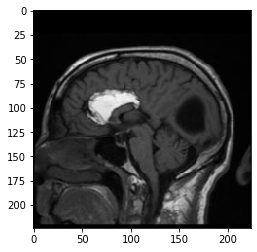

In [120]:
# burada rastgele bir doğrulama resmi seçip
# modele bunu tahmin ettirip resmi çizdiriyoruz
# burada listeden rastgele bir resim dizini aldık
pred_image_name=np.random.choice(val_images)
# bu rastgele dizini kullnarak rastgele bir
# resim yükledik
img = cv2.imread(pred_image_name)
# resmi modele uygun boyuta getirdik
img = cv2.resize(img, (224,224))
# opencv'deki resimler BGR uzayında 
# bunu RGB uzyanı dönüştürdük
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# modele verilecek resim 4 boyutlu olmalı
# bu boyut batch size'ı temsil ediyor
# burada resme ekstra bir boyut ekledik
tensor_image = np.expand_dims(img, axis=0)
# modele tahmin yaptırdık
prediction=model.predict(tensor_image)
# bu tahminden en yüksek değere sahip
# sınıfın indisini aldık.
prediction1 = np.argmax(prediction)
# tahminin hangi etikete ait olduğunu bulduk
tahmin=labels[prediction1]
# resmin indisini yazıyoruz. Burası karışık olsa da
# hangi sınıfa ait olduğu da yazıyor
print('Gercek etiket:',pred_image_name)
# Modelin hangi etiketi tahmin ettiğini yazdırıyoruz
print('Modelin tahmini',tahmin)
plt.imshow(img);